In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rfpimp
import xgboost as xgb

import utils
from data_statistical_features import Segment, SegmentStatistical
import eda_utils
from estimators import *

import os

plt.rcParams.update(utils.get_plt_settings())

save=True

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
xgb_clf = xgb.XGBClassifier(random_state=1)
feature_selection = [
        'hf_diff_acf',
        'hf_diff_data',
        'interval_lengths_std',
        'sqi_std',
        'sqi_min',
        'sqi_median',
        'peak_mean',
        'peak_std',
        'template_corr_highest_sqi_mean',
        'template_corr_highest_sqi_std',
        'template_corr_median_sqi_mean',
        'template_corr_median_sqi_std',
        'interval_means_std',
        'sqi_coverage_03',
        'sqi_coverage_04',
        'sqi_coverage_05'
]
xgb_clf = OwnEstimator(clf=xgb_clf, path="XGB_Clf_reduced_further_test", feature_selection=feature_selection)

Model is trained, this may need some time


AUC: 0.68
F1-Score: 0.53

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.66      0.78      0.71    144087
    informative       0.62      0.46      0.53    109616

       accuracy                           0.64    253703
      macro avg       0.64      0.62      0.62    253703
   weighted avg       0.64      0.64      0.63    253703

MAE auf als informativ klassifizierten Segmenten: 14.37
MAE auf als informativ annotierten Segmenten:  3.28
MAE insgesamt:  21.85
MSE auf als informativ klassifizierten Segmenten: 575.65
MSE auf als informativ annotierten Segmenten:  17.80
MSE insgesamt:  1406.50


Coverage klassifiziert      : 32.12 %
Coverage annotiert          : 43.21 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler < 5 FE klassifizi

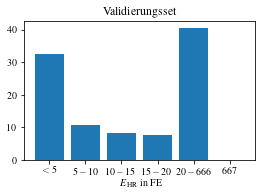

<Figure size 297.644x183.958 with 0 Axes>

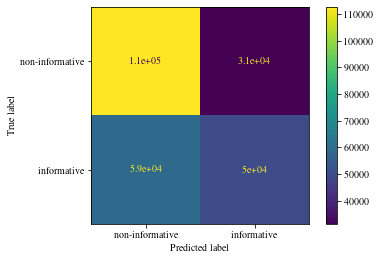

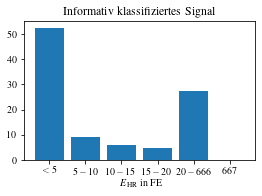

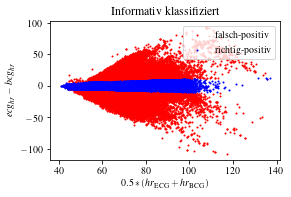

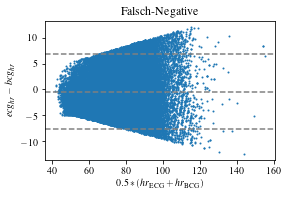

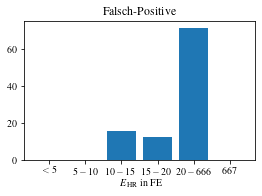

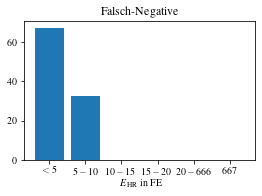

In [5]:
xgb_clf.print_model_test_report()

In [20]:
for col, val in sorted(zip(features.columns, xgb_clf.clf.feature_importances_,), key=lambda x: x[1], reverse=True,):
    print(f"{col:10}{val:10.3f}")

sqi_coverage_04     0.236
hf_diff_data     0.127
sqi_coverage_05     0.094
hf_diff_acf     0.078
abs_energy     0.059
sqi_median     0.055
peak_frequency_acf     0.032
sqi_coverage_03     0.026
interval_lengths_std     0.024
sqi_mean       0.024
number_zero_crossings     0.023
peak_frequency_data     0.022
peak_mean      0.022
hf_ratio_acf     0.020
interval_lengths_range     0.019
skewness       0.018
hf_ratio_data     0.017
std            0.015
kurtosis       0.014
peak_max       0.012
template_corr_median_sqi_std     0.009
interval_lengths_mean     0.007
peak_std       0.007
template_corr_highest_sqi_std     0.007
sqi_min        0.007
sqi_max        0.006
interval_ranges_std     0.006
sqi_std        0.006
template_corr_median_sqi_mean     0.003
interval_stds_std     0.003
template_corr_highest_sqi_mean     0.002
interval_means_std     0.002
mean           0.001
peak_min       0.000


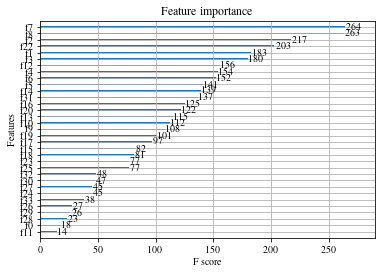

In [22]:
xgb.plot_importance(xgb_clf)